# Librerías

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

import math

from scipy import stats

import itertools

# Métricas

In [2]:
#Error medio absoluto

def mae(df):

    ac = []

    for i in range(len(df.iloc[:,0])):

        v = np.abs(df.iloc[i,1]-df.iloc[i,0])

        ac.append(v)

    mae = np.sum(ac)/len(ac)

    return mae

#Eficiencia Nash-Sutcliffe

def nse(df):

    ac1 = []
    ac2 = []


    for i in range(len(df.iloc[:,0])):

        v1 = (df.iloc[i,0]-df.iloc[i,1])**2
        v2 = (df.iloc[i,0]-df.iloc[:,0].mean())**2
        ac1.append(v1)
        ac2.append(v2)

    nse = 1 - (np.sum(ac1)/np.sum(ac2))

    return nse

#Raíz del error cuadrático medio:

def rmse(df):

    ac = []

    for i in range(len(df.iloc[:,0])):

        v = (df.iloc[i,1]-df.iloc[i,0])**2

        ac.append(v)

    rmse = np.sqrt(np.sum(ac)/len(ac))

    return rmse

#Coeficiente de correlación:

def r(df):

    ac1 = []
    ac2 = []
    ac3 = []

    for i in range(len(df.iloc[:,0])):

        v1 = (df.iloc[i,0]-df.iloc[:,0].mean())*(df.iloc[i,1]-df.iloc[:,1].mean())
        v2 = (df.iloc[i,0]-df.iloc[:,0].mean())**2
        v3 = (df.iloc[i,1]-df.iloc[:,1].mean())**2
        ac1.append(v1)
        ac2.append(v2)
        ac3.append(v3)

    r = np.sum(ac1) / np.sqrt((np.sum(ac2)*np.sum(ac3)))

    return r

"""
Nota: En el dataset la posición df.iloc[:,0] es el valor predicho
y la posición df.iloc[:,1] es el valor observado por lo que debe ir de la
siguiente manera df["Predicción","Observado"]
"""

'\nNota: En el dataset la posición df.iloc[:,0] es el valor predicho\ny la posición df.iloc[:,1] es el valor observado por lo que debe ir de la\nsiguiente manera df["Predicción","Observado"]\n'

# Base de datos completa

In [3]:
df = pd.read_csv("C:/Users/ferna/TESIS/FRESNILLO.csv")

df.head()

,AÑO,MES,T_MEDIA_MAX,T_MED_MIN,T_MEDIA,PRECIP,HR_MED_MAX,HR_MED_MIN,HR_MEDIA,RADIACION,V_V_MED_MAX,V_V_MEDIA,EVAP
0,2002,1,20.7,-0.1,10.2,10.0,82.1,22.0,51.2,554381.5,19.9,7.9,96.5
1,2002,2,23.1,1.8,12.7,15.0,77.1,17.7,43.6,616161.3,22.4,9.3,103.9
2,2002,3,25.4,3.4,15.1,9.0,68.7,13.3,35.8,797706.4,23.6,10.0,190.0
3,2002,4,28.2,6.4,18.3,2.5,62.1,11.0,30.2,852734.4,23.8,10.2,199.4
4,2002,5,29.4,11.3,21.0,13.4,80.1,16.0,44.3,887562.3,24.1,7.3,233.1


# Base de datos de parámetros climatológicos

In [4]:
df = df.drop(["AÑO","MES"],axis=1)

df.head()

,T_MEDIA_MAX,T_MED_MIN,T_MEDIA,PRECIP,HR_MED_MAX,HR_MED_MIN,HR_MEDIA,RADIACION,V_V_MED_MAX,V_V_MEDIA,EVAP
0,20.7,-0.1,10.2,10.0,82.1,22.0,51.2,554381.5,19.9,7.9,96.5
1,23.1,1.8,12.7,15.0,77.1,17.7,43.6,616161.3,22.4,9.3,103.9
2,25.4,3.4,15.1,9.0,68.7,13.3,35.8,797706.4,23.6,10.0,190.0
3,28.2,6.4,18.3,2.5,62.1,11.0,30.2,852734.4,23.8,10.2,199.4
4,29.4,11.3,21.0,13.4,80.1,16.0,44.3,887562.3,24.1,7.3,233.1


# Combinación de variables para los modelos sin evaporación

In [5]:
variables = list(df.drop(["EVAP"],axis=1).columns)

variables

['T_MEDIA_MAX',
 'T_MED_MIN',
 'T_MEDIA',
 'PRECIP',
 'HR_MED_MAX',
 'HR_MED_MIN',
 'HR_MEDIA',
 'RADIACION',
 'V_V_MED_MAX',
 'V_V_MEDIA']

In [6]:
combinaciones = []

for i in range(len(variables)+1):
    
    for j in itertools.combinations(variables, i):
        
        combinaciones.append(list(j))
        
del combinaciones[0]

len(combinaciones)

1023

# Modelos

## Regresión lineal múltiple

In [11]:
scores_models = []

for features in combinaciones:
    
    X = df[features].values
    y = df[["EVAP"]].values
    X_train, X_test, y_train, y_test = X[:156,:],X[156:,:],y[:156,:],y[156:,:]
    
    model = LinearRegression()
    
    model.fit(X_train, y_train)
    
    # Evaluacion
    
    ypred = model.predict(X_test)
    
    Y_predrlm = model.predict(X_test)

    comprlm = pd.DataFrame(data=Y_predrlm,columns=["Predicciones"])

    comprlm["Reales"] = y_test

    score_model = rmse(comprlm)
     
    # Guardas la evaluacion
    
    scores_models.append(score_model)
    
index_min = np.argmin(scores_models)

best_features_rlm = combinaciones[index_min]

best_features_rlm

['T_MED_MIN', 'HR_MED_MAX', 'HR_MED_MIN', 'RADIACION']

In [8]:
X = df[best_features_rlm].values

y = df[["EVAP"]].values

X_train, X_test, y_train, y_test = X[:156,:],X[156:,:],y[:156,:],y[156:,:]

model = LinearRegression()

model.fit(X_train, y_train)

# Evaluacion

ypred = model.predict(X_test)

df_rlm = pd.DataFrame(data=ypred,columns=["Estimados"])

df_rlm["Observados"] = y_test

In [9]:
model.coef_

array([[ 5.68395630e+00, -1.18751369e+00, -1.54053845e+00,
         1.63369864e-04]])

In [10]:
model.intercept_

array([138.46366912])

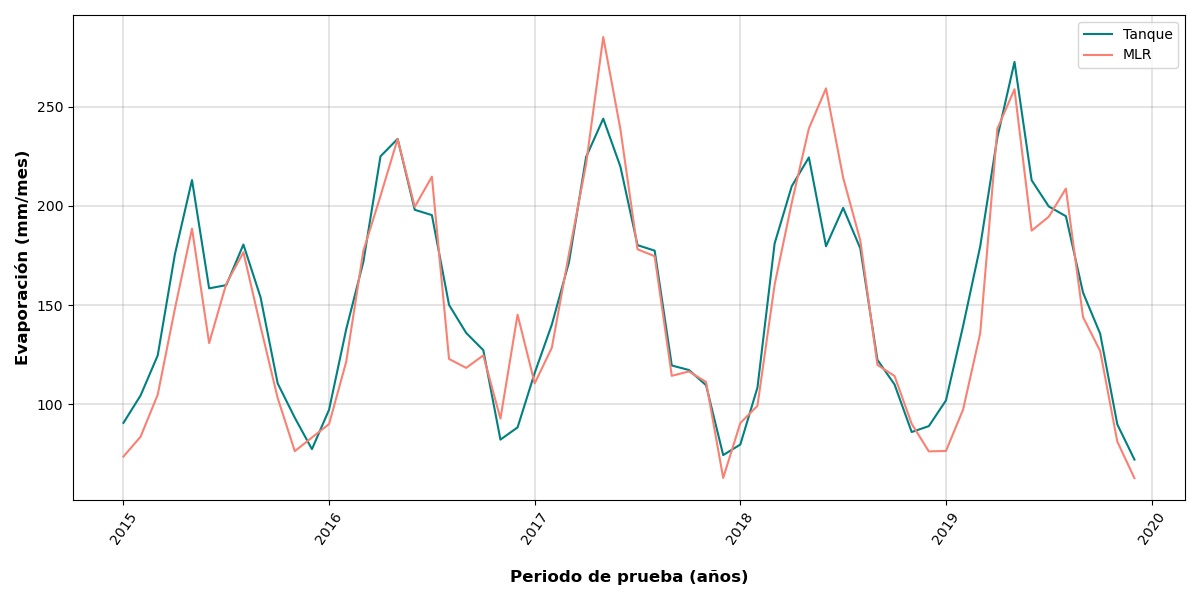

In [73]:
%matplotlib widget

fig = plt.figure(figsize=(12,6))

plt.plot(df_rlm["Estimados"],c="teal",label="Tanque")
plt.plot(df_rlm["Observados"],c="salmon",label="MLR")

plt.xlabel("\nPeriodo de prueba (años)", fontweight="bold", fontsize=12)
plt.ylabel("Evaporación (mm/mes)", fontweight="bold", fontsize=12)

plt.xticks(range(0,72,12), 
           [2015,2016,2017,2018,2019,2020],
           rotation=55)

plt.tight_layout()

plt.grid(c='gray',linewidth=0.3)

plt.legend()

#plt.savefig("fres_tan_rlm.png", bbox_inches="tight")

plt.show()

In [11]:
print("R:")

print(r(df_rlm))

print("RMSE:")

print(rmse(df_rlm))

print("MAE:")

print(mae(df_rlm))

print("NSE:")

print(nse(df_rlm))

R:
0.9360108468941544
RMSE:
20.532686479683676
MAE:
14.660643181454967
NSE:
0.8401388698648073


## Bosques aleatorios

In [64]:
scores_models = []

for features in combinaciones:
    
    X = df[features].values
    
    y = df[["EVAP"]].values
    
    X_train, X_test, y_train, y_test = X[:156,:],X[156:,:],y[:156,:],y[156:,:]
    
    model = RandomForestRegressor(n_estimators=180,max_depth=10) 
    
    model.fit(X_train, y_train)
    
    # Evaluacion
    
    Y_predrlm = model.predict(X_test)

    comprlm = pd.DataFrame(data=Y_predrlm,columns=["Predicciones"])

    comprlm["Reales"] = y_test

    score_model = rmse(comprlm)
     
    # Guardas la evaluacion
    
    scores_models.append(score_model)
    
index_min = np.argmin(scores_models)

best_features_rf = combinaciones[index_min]

best_features_rf

['T_MEDIA', 'HR_MED_MAX', 'RADIACION']

In [65]:
X = df[best_features_rf].values

y = df[["EVAP"]].values

X_train, X_test, y_train, y_test = X[:156,:],X[156:,:],y[:156,:],y[156:,:]

model = RandomForestRegressor(n_estimators=180,max_depth=10)

model.fit(X_train, y_train)

# Evaluacion

ypred = model.predict(X_test)

df_rf = pd.DataFrame(data=ypred,columns=["Estimados"])

df_rf["Observados"] = y_test

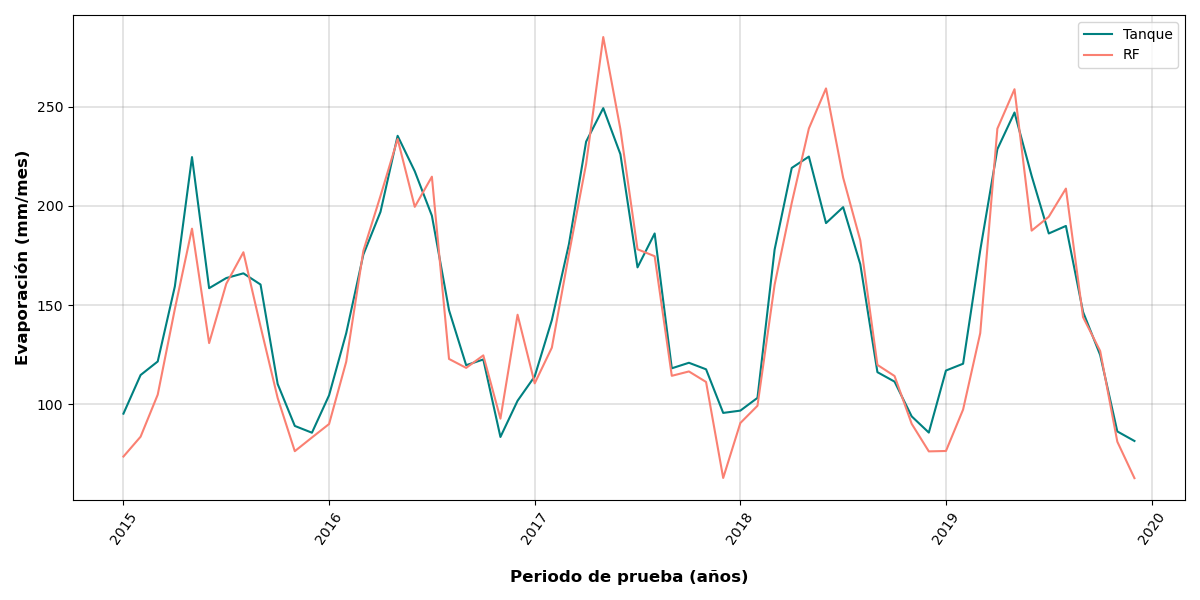

In [87]:
%matplotlib widget

fig = plt.figure(figsize=(12,6))

plt.plot(df_rf["Estimados"],c="teal",label="Tanque")
plt.plot(df_rf["Observados"],c="salmon",label="RF")

plt.xlabel("\nPeriodo de prueba (años)", fontweight="bold", fontsize=12)
plt.ylabel("Evaporación (mm/mes)", fontweight="bold", fontsize=12)

plt.xticks(range(0,72,12), 
           [2015,2016,2017,2018,2019,2020],
           rotation=55)

plt.tight_layout()

plt.grid(c='gray',linewidth=0.3)

plt.legend()

#plt.savefig("fres_tan_rf.png", bbox_inches="tight")

plt.show()

In [67]:
print("R:")

print(r(df_rf))

print("RMSE:")

print(rmse(df_rf))

print("MAE:")

print(mae(df_rf))

print("NSE:")

print(nse(df_rf))

R:
0.9442275680069512
RMSE:
19.734166373082676
MAE:
14.922313574876762
NSE:
0.8395543422937211


## KNN

In [74]:
scores_models = []

for features in combinaciones:
    
    X = df[features].values
    
    y = df[["EVAP"]].values
    
    X_train, X_test, y_train, y_test = X[:156,:],X[156:,:],y[:156,:],y[156:,:]
    
    model = KNeighborsRegressor(n_neighbors=3) 
    
    model.fit(X_train, y_train)
    
    # Evaluacion
    
    Y_predrlm = model.predict(X_test)

    comprlm = pd.DataFrame(data=Y_predrlm,columns=["Predicciones"])

    comprlm["Reales"] = y_test

    score_model = rmse(comprlm)
     
    # Guardas la evaluacion
    
    scores_models.append(score_model)
    
index_min = np.argmin(scores_models)

best_features_knn = combinaciones[index_min]

best_features_knn

['T_MEDIA_MAX', 'T_MED_MIN', 'T_MEDIA', 'HR_MED_MAX', 'V_V_MED_MAX']

In [75]:
X = df[best_features_knn].values

y = df[["EVAP"]].values

X_train, X_test, y_train, y_test = X[:156,:],X[156:,:],y[:156,:],y[156:,:]

model = KNeighborsRegressor(n_neighbors=3)

model.fit(X_train, y_train)

# Evaluacion

ypred = model.predict(X_test)

df_knn = pd.DataFrame(data=ypred,columns=["Estimados"])

df_knn["Observados"] = y_test

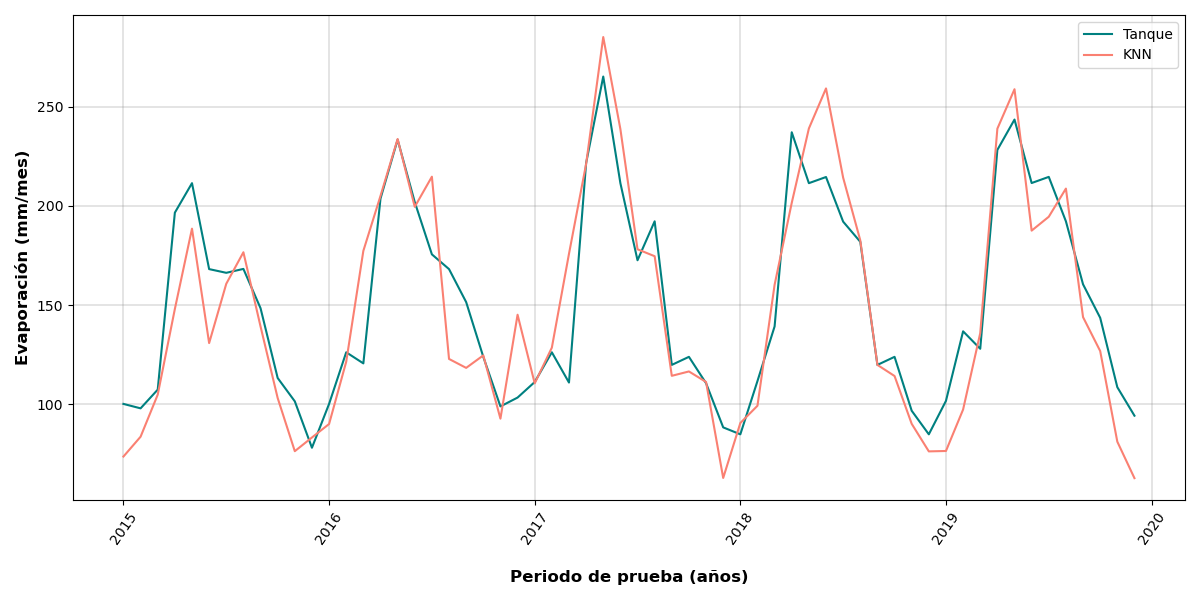

In [76]:
%matplotlib widget

fig = plt.figure(figsize=(12,6))

plt.plot(df_knn["Estimados"],c="teal",label="Tanque")
plt.plot(df_knn["Observados"],c="salmon",label="KNN")

plt.xlabel("\nPeriodo de prueba (años)", fontweight="bold", fontsize=12)
plt.ylabel("Evaporación (mm/mes)", fontweight="bold", fontsize=12)

plt.xticks(range(0,72,12), 
           [2015,2016,2017,2018,2019,2020],
           rotation=55)

plt.tight_layout()

plt.grid(c='gray',linewidth=0.3)

plt.legend()

#plt.savefig("fres_tan_knn.png", bbox_inches="tight")

plt.show()

In [78]:
print("R:")

print(r(df_knn))

print("RMSE:")

print(rmse(df_knn))

print("MAE:")

print(mae(df_knn))

print("NSE:")

print(nse(df_knn))

R:
0.9113534331014161
RMSE:
23.770638985474875
MAE:
18.02611111111111
NSE:
0.7677830524190578


# Modelos de regresión lineal

## MLR

In [79]:
x = df_rlm["Estimados"]

y = df_rlm['Observados']

n = len(df.iloc[:,7])

sumx = x.sum()
sumy = y.sum()
sumx2 = (x**2).sum()
sumy2 = (y**2).sum()
sumxy = (x*y).sum()
promx = sumx/n
promy = sumy/n

m = (sumx*sumy - n*sumxy)/(sumx**2 -n*sumx2)
b = promy - m*promx

print(f"La función es: {round(m,3)}x {round(b,3)}")

sigmax = np.sqrt(sumx2/n - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
sigmaxy = sumxy/n - promx*promy

R2 = (sigmaxy / (sigmax*sigmay)) ** 2

print(R2)

La función es: 0.982x -0.369
0.9784964698237565


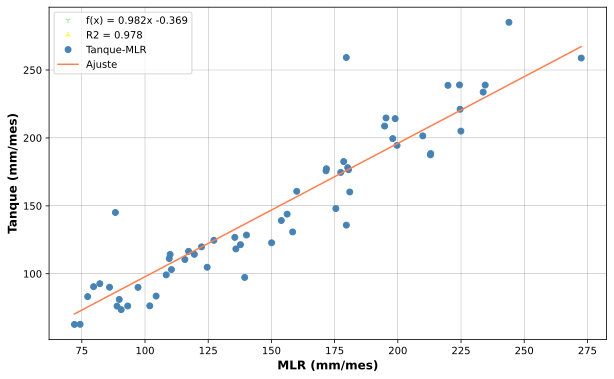

In [82]:
%matplotlib inline

%config InlineBackend.figure_format="svg"

fig = plt.figure(figsize=(10,6))

#plt.title("Regresión lineal")

plt.plot(x,y,"1", label=f"f(x) = {round(m,3)}x {round(b,3)}",c='lightgreen')
plt.plot(x,y,"2", label=f"R2 = {round(R2,3)}",c='yellow')
plt.plot(x,y,"o", label="Tanque-MLR",c='steelblue')
plt.plot(x,m*x+b,label="Ajuste",c='coral')

plt.xlabel("MLR (mm/mes)",fontweight="bold", fontsize=12)
plt.ylabel("Tanque (mm/mes)",fontweight="bold", fontsize=12)


plt.legend()
plt.grid(c='gray',linewidth=0.3)

#plt.savefig("fres_tan_mlr_corr.png", bbox_inches="tight")

plt.show()

## RF

In [84]:
x = df_rf['Estimados']
y = df_rf['Observados']

n = len(df.iloc[:,7])

sumx = x.sum()
sumy = y.sum()
sumx2 = (x**2).sum()
sumy2 = (y**2).sum()
sumxy = (x*y).sum()
promx = sumx/n
promy = sumy/n

m = (sumx*sumy - n*sumxy)/(sumx**2 -n*sumx2)
b = promy - m*promx

print(f"La función es: {round(m,3)}x {round(b,3)}")

sigmax = np.sqrt(sumx2/n - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
sigmaxy = sumxy/n - promx*promy

R2 = (sigmaxy / (sigmax*sigmay)) ** 2

print(R2)

La función es: 0.987x -0.635
0.9800413034155403


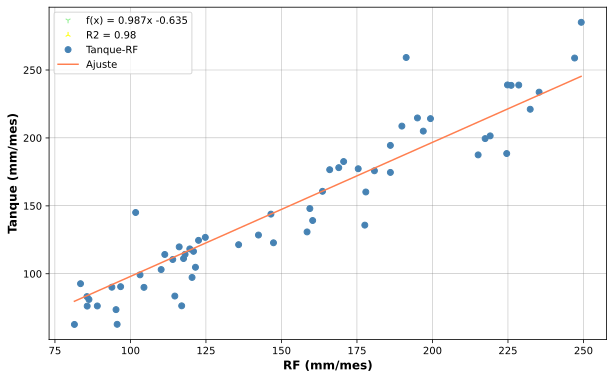

In [86]:
%matplotlib inline

%config InlineBackend.figure_format="svg"

fig = plt.figure(figsize=(10,6))

#plt.title("Regresión lineal")

plt.plot(x,y,"1", label=f"f(x) = {round(m,3)}x {round(b,3)}",c='lightgreen')
plt.plot(x,y,"2", label=f"R2 = {round(R2,3)}",c='yellow')
plt.plot(x,y,"o", label="Tanque-RF",c='steelblue')
plt.plot(x,m*x+b,label="Ajuste",c='coral')

plt.xlabel("RF (mm/mes)",fontweight="bold", fontsize=12)
plt.ylabel("Tanque (mm/mes)",fontweight="bold", fontsize=12)


plt.legend()
plt.grid(c='gray',linewidth=0.3)

plt.savefig("fres_tan_rf_corr.png", bbox_inches="tight")

plt.show()

## KNN

In [88]:
x = df_knn['Observados']
y = df_knn['Estimados']

n = len(df.iloc[:,7])

sumx = x.sum()
sumy = y.sum()
sumx2 = (x**2).sum()
sumy2 = (y**2).sum()
sumxy = (x*y).sum()
promx = sumx/n
promy = sumy/n

m = (sumx*sumy - n*sumxy)/(sumx**2 -n*sumx2)
b = promy - m*promx

print(f"La función es: {round(m,3)}x + {round(b,3)}")

sigmax = np.sqrt(sumx2/n - promx**2)
sigmay = np.sqrt(sumy2/n - promy**2)
sigmaxy = sumxy/n - promx*promy

R2 = (sigmaxy / (sigmax*sigmay)) ** 2

print(R2)

La función es: 0.982x + 1.614
0.9706816619797051


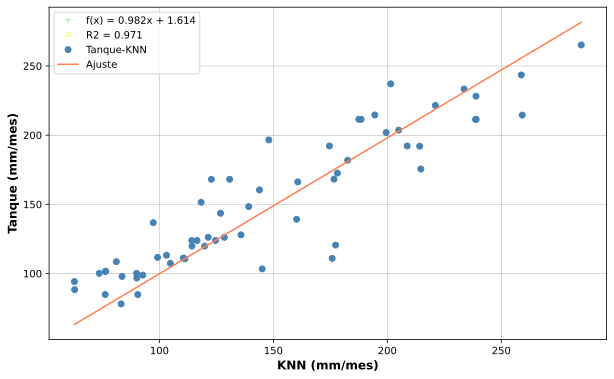

In [91]:
%matplotlib inline

%config InlineBackend.figure_format="svg"

fig = plt.figure(figsize=(10,6))

#plt.title("Regresión lineal")

plt.plot(x,y,"1", label=f"f(x) = {round(m,3)}x + {round(b,3)}",c='lightgreen')
plt.plot(x,y,"2", label=f"R2 = {round(R2,3)}",c='yellow')
plt.plot(x,y,"o", label="Tanque-KNN",c='steelblue')
plt.plot(x,m*x+b,label="Ajuste",c='coral')

plt.xlabel("KNN (mm/mes)",fontweight="bold", fontsize=12)
plt.ylabel("Tanque (mm/mes)",fontweight="bold", fontsize=12)


plt.legend()
plt.grid(c='gray',linewidth=0.3)

plt.savefig("fres_tan_knn_corr.png", bbox_inches="tight")

plt.show()